<a href="https://colab.research.google.com/github/NiharikaAmritkar/AI-ML/blob/main/CNN_cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
#initializing CNN
classifier= Sequential()

In [3]:
#convolution
classifier.add(Convolution2D(32, 3, 3, input_shape= (64, 64, 3), activation = 'relu')) #32 is no. of filters and 3, 3 is no. of rows and columns of the filter

In [4]:
#pooling
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [5]:
#flattening
classifier.add(Flatten())

In [6]:
#full connection
classifier.add(Dense( 128, activation= 'relu')) #units is no. of nodes in the hidden layer
classifier.add(Dense( 1, activation= 'sigmoid')) #output layer

In [7]:
#compiling CNN
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen= ImageDataGenerator(rescale= 1./255)

training_set= train_datagen.flow_from_directory('/content/drive/MyDrive/training_set',
                                                target_size=(64, 64),
                                                batch_size= 128,
                                                class_mode='binary') #target size is the size of images expected in the CNN model

test_set= test_datagen.flow_from_directory('/content/drive/MyDrive/test_set',
                                           target_size=(64, 64),
                                           batch_size= 128,
                                           class_mode='binary')

classifier.fit_generator(training_set,
                    epochs= 25,
                    validation_data= test_set,
                    )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


<ipython-input-15-3d25aa90223c>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/25
63/63 [==============================] - 62s 980ms/step - loss: 0.5702 - accuracy: 0.6976 - val_loss: 0.5771 - val_accuracy: 0.7005
Epoch 2/25
63/63 [==============================] - 64s 1s/step - loss: 0.5537 - accuracy: 0.7194 - val_loss: 0.5687 - val_accuracy: 0.7140
Epoch 3/25
63/63 [==============================] - 60s 950ms/step - loss: 0.5505 - accuracy: 0.7128 - val_loss: 0.5871 - val_accuracy: 0.6925
Epoch 4/25
63/63 [==============================] - 60s 957ms/step - loss: 0.5341 - accuracy: 0.7358 - val_loss: 0.6056 - val_accuracy: 0.6810
Epoch 5/25
63/63 [==============================] - 64s 1s/step - loss: 0.5322 - accuracy: 0.7304 - val_loss: 0.5268 - val_accuracy: 0.7395
Epoch 6/25
63/63 [==============================] - 61s 966ms/step - loss: 0.5193 - accuracy: 0.7434 - val_loss: 0.5870 - val_accuracy: 0.7020
Epoch 7/25
63/63 [==============================] - 62s 992ms/step - loss: 0.5146 - accuracy: 0.7458 - val_loss: 0.5198 - val_accuracy: 0.7530
Epoch

In [21]:
import pandas as pd
metrics=pd.DataFrame(classifier.history.history)

<Axes: >

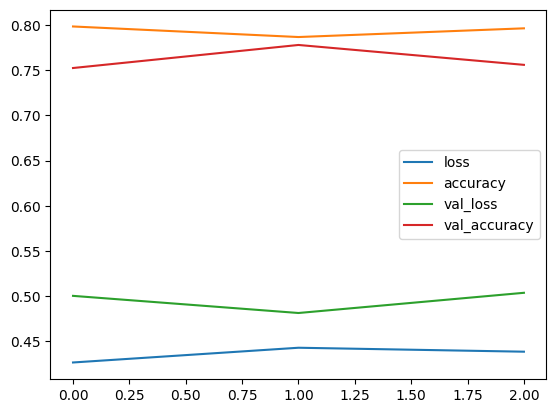

In [22]:
metrics.plot()

In [23]:
classifier.evaluate(test_set)

16/16 [==============================] - 9s 559ms/step - loss: 0.5038 - accuracy: 0.7560


[0.5038263201713562, 0.7559999823570251]